In [1]:
#global import
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import inv,pinvh,eig,eigh
from scipy.stats import linregress
%matplotlib inline
# local import
from code.slope import Slope

In [59]:
def MatrixGen(a=1,p=1,nx=100):
    # power subdunction
    def power(M,r) :
        D,P = eigh(M)
        D = np.diag(D**r)
        return P.dot(D).dot(np.transpose(P))
    # initialisation
    dx   = 1/nx
    # Matrice opérateur
    T = np.zeros((nx,nx))
    coeff = 1/(2*a)*nx**-a
    for i in range(nx):
        for j in range(nx):#lower half
            if i<j:
                T[i,j] = coeff*((j-i+1)**(a)\
                               -(j-i-1)**(a))
            elif i==j:#diagonal
                    T[i,j] = coeff
    T   = np.transpose(T)
    tTT = np.transpose(T).dot(T)
    # Matrice regularisation
    tDD = 2*np.diag(np.ones(nx))\
          -np.diag(np.ones(nx-1),-1)\
          -np.diag(np.ones(nx-1),1)
#     else:
#         B   = 2*nx**2*np.diag(np.ones(nx)) \
#                   - nx**2*np.diag(np.ones(nx-1),1)\
#                   - nx**2*np.diag(np.ones(nx-1),-1)
#         B[0,0]= nx**2
#         D   = power(B,p/2)
#         tDD = np.transpose(D).dot(D)
    # Matrix norm
    q   = 2*p+a
    R   = power(D.dot(D),q/2)
    return T,tTT, tDD

In [60]:
T,tTT,tDD = MatrixGen(a=1,p=2,nx=10)

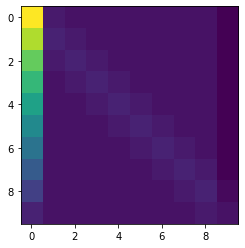

In [63]:
plt.imshow(tTT.dot(tDD))

In [46]:
np.linalg.norm(D.dot(T))

3.162277660199816

In [47]:
np.sqrt(10)

3.1622776601683795